# This section plots the Manhattan plot for all the 17 IPF variants

/Users/alireza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alireza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alireza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alireza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alireza/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alireza/opt/anaconda3/lib/python3

<Figure size 432x288 with 0 Axes>

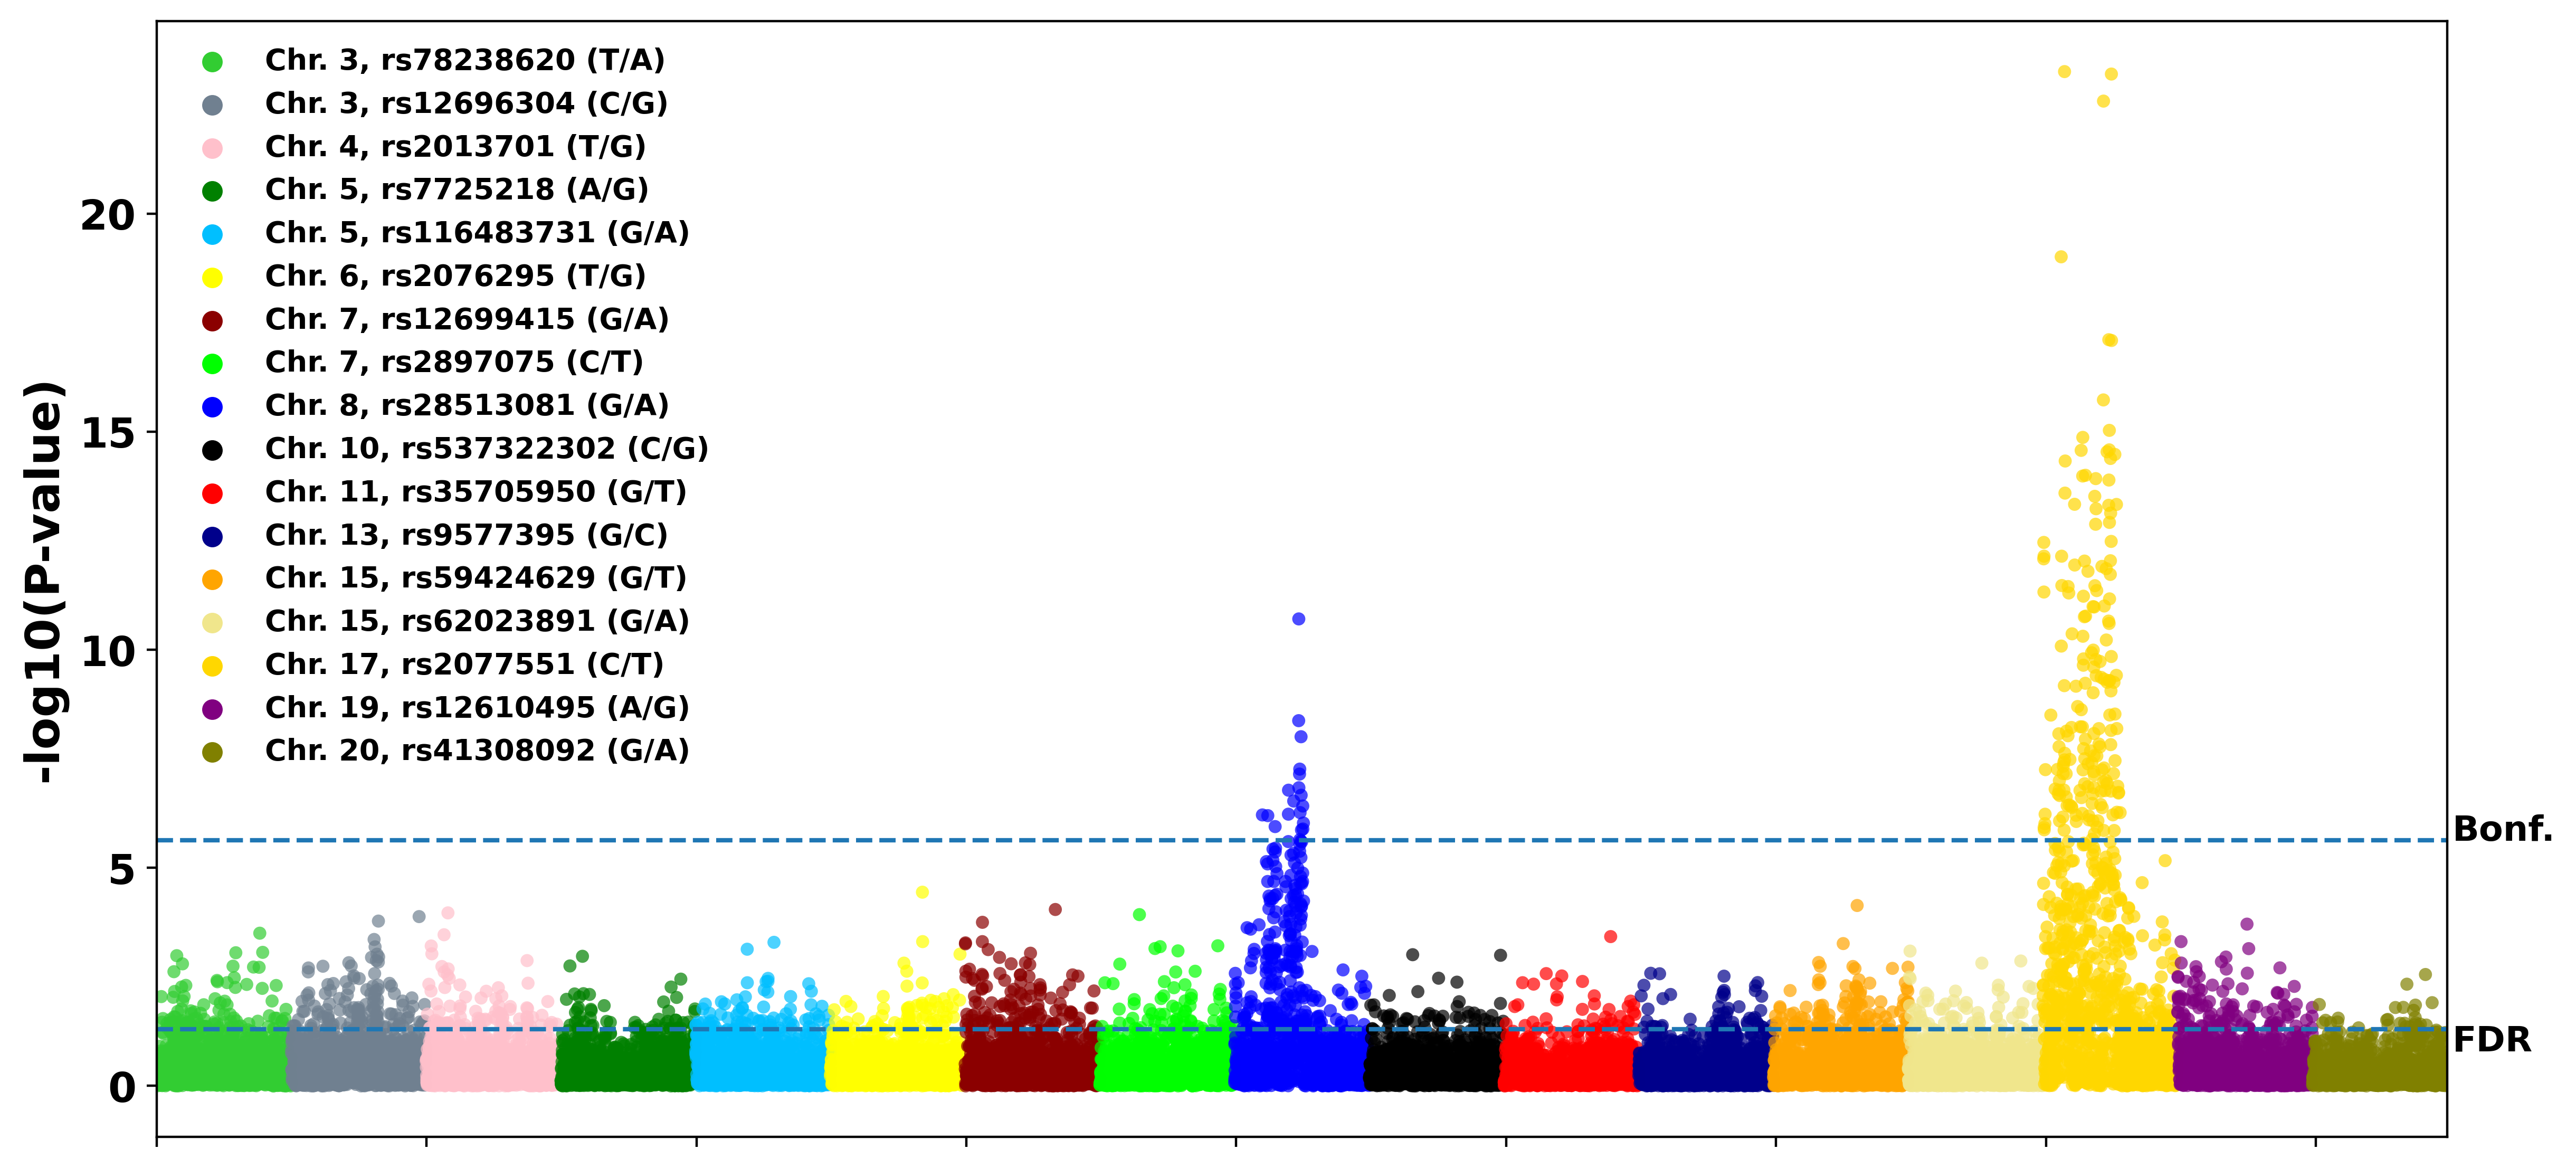

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from scipy.io import loadmat
import os

cwd = os.getcwd()
Data_path = cwd + "/data"

SNP_names=["test", "Chr. 3, rs78238620 (T/A)", "Chr. 3, rs12696304 (C/G)"
                 , "Chr. 4, rs2013701 (T/G)", "Chr. 5, rs7725218 (A/G)"
                 , "Chr. 5, rs116483731 (G/A)", "Chr. 6, rs2076295 (T/G)"
                 , "Chr. 7, rs12699415 (G/A)", "Chr. 7, rs2897075 (C/T)"
                 , "Chr. 8, rs28513081 (G/A)", "Chr. 10, rs537322302 (C/G)"
                 , "Chr. 11, rs35705950 (G/T)", "Chr. 13, rs9577395 (G/C)"
                 , "Chr. 15, rs59424629 (G/T)", "Chr. 15, rs62023891 (G/A)"
                 , "Chr. 17, rs2077551 (C/T)", "Chr. 19, rs12610495 (A/G)"
                 , "Chr. 20, rs41308092 (G/A)"]

df_gwas = pd.DataFrame(columns=["log10_UNADJ", "SNPs"])
df_temp = pd.DataFrame(columns=["log10_UNADJ", "SNPs"])

for i in range(1,18): 
    
    number_str = str(i)
    zero_filled_number = number_str.zfill(2)

    data = np.loadtxt(open(Data_path + "/IPF_{0}.txt".format(zero_filled_number), "rb"), delimiter="\t")
    df = pd.DataFrame(data, columns = ['BETA' , 'T_STAT' , 'UNADJ' , 'GC' , 'BONF' , 'HOLM' , 'SIDAK_SS' , 'SIDAK_SD' , 'FDR_BH' , 'FDR_BY'])

    df['ind'] = range(len(df))
    df['log10_UNADJ'] = -np.log10(df['UNADJ'])
    df['names'] = [SNP_names[i]] * len(df)

    if i == 1:
        df_gwas.log10_UNADJ = df.log10_UNADJ
        df_gwas.SNPs = [SNP_names[i]] * len(df)
    else:
        df_temp.log10_UNADJ = df.log10_UNADJ
        df_temp.SNPs = [SNP_names[i]] * len(df)

        df_gwas = pd.concat([df_gwas , df_temp] , axis=0, ignore_index=True)

        
df_gwas['ind'] = range(len(df_gwas))

fig = plt.figure()
fig = plt.figure(num=None, figsize=(14, 7), dpi=400, facecolor='w', edgecolor='k')
colors = ['limegreen','slategrey','pink','green','deepskyblue','yellow','darkred','lime','blue','black','red','darkblue','orange','khaki','gold','purple','olive']

x_labels = []
x_labels_pos = []

ax = sns.scatterplot(x="ind", 
                     y="log10_UNADJ", 
                     data=df_gwas, 
                     hue="SNPs", 
                     palette=colors, 
                     legend='full', 
                     markers=['.'],
                     linewidth=0,
                     alpha = 0.7,
                     s=20,
                    )

ax.set_xlim([0, len(df_gwas)])

ax.axhline(-np.log10(0.05 / (17 * len(df))), ls='--')
ax.text(len(df_gwas) + 50 , -np.log10(0.05 / (17 * len(df))), "Bonf.", fontsize=12, weight='bold')

ax.axhline(-np.log10(0.05), ls='--')
ax.text(len(df_gwas) + 50 , -np.log10(0.05) - 0.50, "FDR", fontsize=12, weight='bold')

ax.set(xticklabels=[])
plt.yticks(fontsize=14, weight='bold')
plt.ylabel("-log10(P-value)",fontsize=16, weight='bold')
plt.xlabel("",fontsize=16, weight='bold')

ax.legend(
          frameon=False
         )

plt.setp(ax.get_legend().get_texts(), fontsize='10', weight='bold') # for legend text

plt.show(ax)

